### Handling Missing Values

### Mean/Median/Mode imputation :

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [326]:
path=r'C:\Users\Sudhakar\Downloads\Compressed\Feature-Engineering-Live-sessions-master'

In [157]:
df=pd.read_csv(path+r'\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
def impute_nan(df,variable):
    median=df[variable].median()
    df[variable+'_median']=df[variable].fillna(median)

In [28]:
impute_nan(df,'Age')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


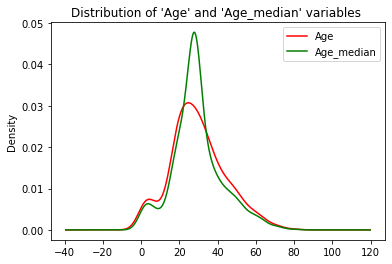

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
df.Age.plot(kind='kde',color='red')
df.Age_median.plot(kind='kde',color='green')
plt.legend()
plt.title("Distribution of 'Age' and 'Age_median' variables ")
plt.show()

From the above plot we can notice that there is **change in the original variance of the variable**.

### Random Sample Imputation

In [36]:
df=pd.read_csv(path+r'\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
def impute_nan(df,variable):
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [38]:
impute_nan(df,'Age')

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


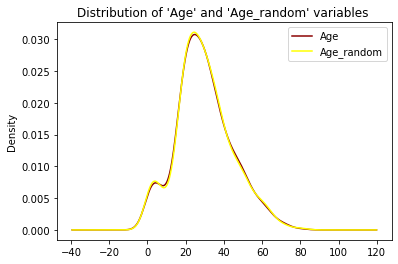

In [43]:
plt.figure()
df.Age.plot(kind='kde',color='darkred')
df.Age_random.plot(kind='kde',color='yellow')
plt.legend()
plt.title("Distribution of 'Age' and 'Age_random' variables ")
plt.show()

From the above plot we can see that **there is a very small change in the original variance**.But in every situation randomness doesn't work.

### Capturing Nan with a new Feature

In [49]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [50]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

Presence of NaN's is captured in Age_nan variable,this variable shows the importance of missingness in the variable,Further we will impute the NaN's in 'Age' by replacing it with median of age

In [51]:
median=df['Age'].median()
median

28.0

In [52]:
df['Age'].fillna(median,inplace=True)

In [53]:
df.head()

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### End of Distribution

In [54]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


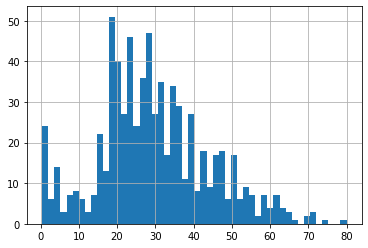

In [134]:
df.Age.hist(bins=50)
plt.show()

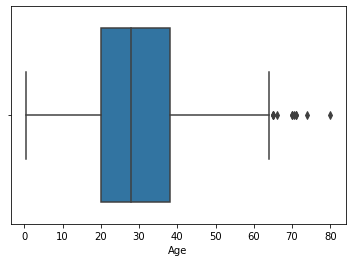

In [133]:
import seaborn as sns
sns.boxplot('Age',data=df)
plt.show()

In [59]:
extreme=df['Age'].mean()+3*df['Age'].std()
extreme

73.27860964406095

In [60]:
median=df['Age'].mean()
median

29.69911764705882

In [61]:
def impute_nan(df,variable,extreme,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_End_of_distribution']=df[variable].fillna(extreme)

In [62]:
impute_nan(df,'Age',extreme,median)

In [63]:
df.head()

,Survived,Age,Fare,Age_median,Age_End_of_distribution
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


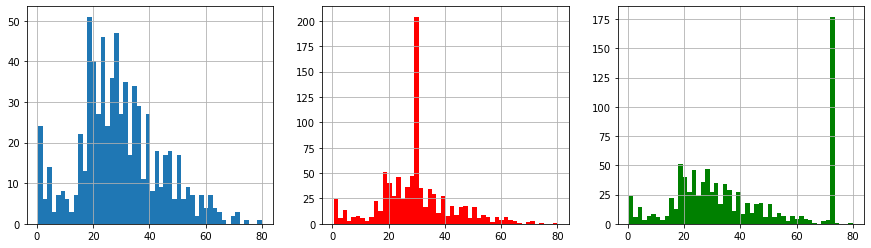

In [131]:
plt.figure(figsize=(15,4))

plt.subplot(131)
df['Age'].hist(bins=50)

plt.subplot(132)
df['Age_median'].hist(bins=50,color='red')

plt.subplot(133)
df['Age_End_of_distribution'].hist(bins=50,color='green')

plt.show()

In the above plots we can notice that the variation in the distribution of variables
In the second histogram we can find a increased bin at mean ,which means the nan valuse are imputed at mean,similarly in the third histogram we can find a increased bin at end of the distribution which shows that the nan values are now imputed at tail part of the distribution

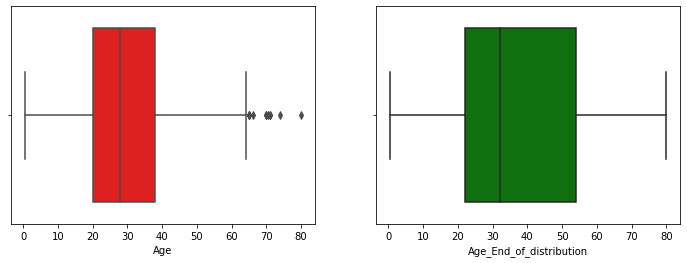

In [135]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot('Age',data=df,color='red')
plt.subplot(122)
sns.boxplot('Age_End_of_distribution',data=df,color='green')
plt.show()

From the above boxplots we can see after imputation the outliers are masked into the distribution

### Arbitrary value imputation

In [136]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [144]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_eighty']=df[variable].fillna(80)

In [145]:
impute_nan(df,'Age')

In [146]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred,Age_eighty
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


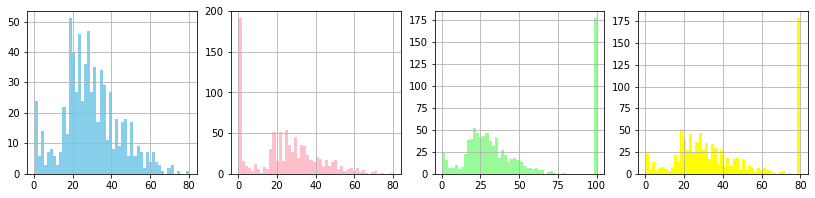

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,3))
plt.subplot(141)
df['Age'].hist(bins=50,color='skyblue')
plt.subplot(142)
df['Age_zero'].hist(bins=50,color='pink')
plt.subplot(143)
df['Age_hundred'].hist(bins=50,color='palegreen')
plt.subplot(144)
df['Age_eighty'].hist(bins=50,color='yellow')
plt.show()

### Handling missing categorical variables

### Frequent category imputation

In [4]:
path=r'C:\Users\Sudhakar\Downloads\Compressed\Advanced-House-Price-Prediction--master'

In [159]:
df=pd.read_csv(path+r'\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [160]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [161]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [162]:
df=pd.read_csv(path+r'\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [172]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

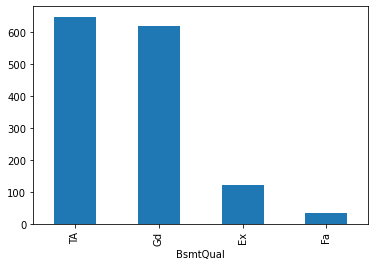

In [168]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

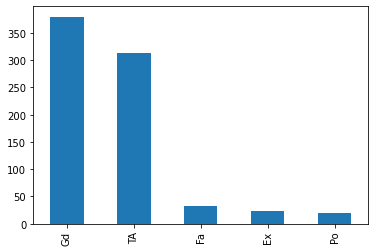

In [171]:
df.FireplaceQu.value_counts().plot.bar()

<AxesSubplot:>

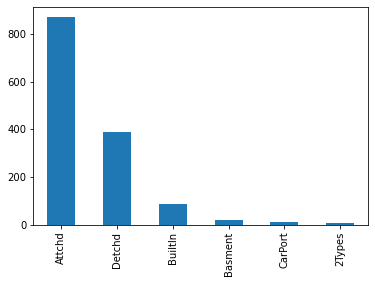

In [173]:
df.GarageType.value_counts().plot.bar()

In [180]:
def impute_nan(df,variable):
    frequent=df[variable].mode()[0]
    df[variable+'_new']=df[variable].fillna(frequent)   

In [184]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,features)

In [185]:
df.isnull().sum()

BsmtQual            37
FireplaceQu        690
GarageType          81
SalePrice            0
BsmtQual_new         0
FireplaceQu_new      0
GarageType_new       0
dtype: int64

In [186]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice', 'BsmtQual_new',
       'FireplaceQu_new', 'GarageType_new'],
      dtype='object')

In [187]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'],axis=1,inplace=True)

In [188]:
df.head()

,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Capturing the importance of nan along with imputing the missing values

In [13]:
df=pd.read_csv(path+r'\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [14]:
def impute_nan(df,variable):
    df[variable+'_new']=np.where(df[variable].isnull(),1,0)
    frequent=df[variable].mode()[0]
    df[variable]=df[variable].fillna(frequent)

In [17]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [18]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [19]:
df.isnull().sum()

BsmtQual           0
FireplaceQu        0
GarageType         0
SalePrice          0
BsmtQual_new       0
FireplaceQu_new    0
GarageType_new     0
dtype: int64

### Imputing NaN's with a separate label (This is one of the most frequent used method)

In [33]:
df=pd.read_csv(path+r'\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [34]:
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),'Missing',df[variable])

In [35]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

In [36]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


#### Encoding

#### One-Hot-Encoding

In [55]:
import pandas as pd
import numpy as np

In [56]:
path=r'C:\Users\Sudhakar\Downloads\Compressed\Feature-Engineering-Live-sessions-master'

In [141]:
df=pd.read_csv(path+r'\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df.dropna(inplace=True)

In [143]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [227]:
df=pd.get_dummies(df[['Sex','Embarked']],drop_first=True)

In [228]:
df.head()

,Sex_male,Embarked_Q,Embarked_S
1,0,0,0
3,0,0,1
6,1,0,1
10,0,0,1
11,0,0,1


In [230]:
path=r'C:\Users\Sudhakar\Python Files'

In [232]:
df=pd.read_csv(path+r'\mercedes.csv')
df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [235]:
cat_fea=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in cat_fea:
    print(feature)

X0
X1
X2
X3
X4
X5
X6
X8


In [237]:
df=df[cat_fea]
df.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [247]:
list_10=df['X1'].value_counts().sort_values(ascending=False).head(10).index
list_10=list(list_10)
list_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [249]:
for labels in list_10:
    df[labels]=np.where(df['X1']==labels,1,0)

In [251]:
list_10.append('X1')

In [253]:
df[list_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


### One hot encoding using SKlearn

In [376]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Sex','Embarked'])
df.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [377]:
df.dropna(inplace=True)

In [378]:
from sklearn.preprocessing import OneHotEncoder

In [379]:
ohe=OneHotEncoder(sparse=False)

In [380]:
trans=ohe.fit_transform(df[['Sex','Embarked']])

In [381]:
trans

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [383]:
col_names=ohe.get_feature_names_out().tolist()
col_names

['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [384]:
df1=pd.DataFrame(trans,columns=col_names)

In [385]:
df1.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


#### Ordinal Number Encoding

In [256]:
import datetime

In [259]:
today_date=datetime.datetime.today()
today_date

datetime.datetime(2022, 5, 31, 22, 35, 42, 307320)

In [264]:
days=[today_date-datetime.timedelta(x) for x in range(1,16)]
days

[datetime.datetime(2022, 5, 30, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 29, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 28, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 27, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 26, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 25, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 24, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 23, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 22, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 21, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 20, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 19, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 18, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 17, 22, 35, 42, 307320),
 datetime.datetime(2022, 5, 16, 22, 35, 42, 307320)]

In [286]:
df=pd.DataFrame(days,columns=['Day'])
df.head()

,Day
0,2022-05-30 22:35:42.307320
1,2022-05-29 22:35:42.307320
2,2022-05-28 22:35:42.307320
3,2022-05-27 22:35:42.307320
4,2022-05-26 22:35:42.307320


In [287]:
df['Weekday']=df['Day'].dt.day_name()
df.head()

,Day,Weekday
0,2022-05-30 22:35:42.307320,Monday
1,2022-05-29 22:35:42.307320,Sunday
2,2022-05-28 22:35:42.307320,Saturday
3,2022-05-27 22:35:42.307320,Friday
4,2022-05-26 22:35:42.307320,Thursday


In [280]:
dict_={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
dict_

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [282]:
df['Weekday'].map(dict_)

0     1
1     7
2     6
3     5
4     4
5     3
6     2
7     1
8     7
9     6
10    5
11    4
12    3
13    2
14    1
Name: Weekday, dtype: int64

In [283]:
df['Weekday_ordinal']=df['Weekday'].map(dict_)
df.head()

,Day,Weekday,Weekday_ordinal
0,2022-05-30 22:35:42.307320,Monday,1
1,2022-05-29 22:35:42.307320,Sunday,7
2,2022-05-28 22:35:42.307320,Saturday,6
3,2022-05-27 22:35:42.307320,Friday,5
4,2022-05-26 22:35:42.307320,Thursday,4


In [386]:
today_date=datetime.datetime.today()
days=[today_date-datetime.timedelta(x) for x in range(15)]
days

[datetime.datetime(2022, 5, 31, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 30, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 29, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 28, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 27, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 26, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 25, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 24, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 23, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 22, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 21, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 20, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 19, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 18, 23, 37, 44, 629657),
 datetime.datetime(2022, 5, 17, 23, 37, 44, 629657)]

In [387]:
df=pd.DataFrame(days,columns=['Day'])

In [388]:
df['Day_name']=df['Day'].dt.day_name()

In [389]:
df.head()

,Day,Day_name
0,2022-05-31 23:37:44.629657,Tuesday
1,2022-05-30 23:37:44.629657,Monday
2,2022-05-29 23:37:44.629657,Sunday
3,2022-05-28 23:37:44.629657,Saturday
4,2022-05-27 23:37:44.629657,Friday


In [315]:
from sklearn.preprocessing import OrdinalEncoder

In [390]:
oe=OrdinalEncoder()

In [317]:
trans_df=oe.fit_transform(df[['Day_name']])

In [318]:
trans_df

array([[5.],
       [1.],
       [3.],
       [2.],
       [0.],
       [4.],
       [6.],
       [5.],
       [1.],
       [3.],
       [2.],
       [0.],
       [4.],
       [6.],
       [5.]])

In [320]:
df1=pd.DataFrame(trans_df,columns=['Encoded_day_name'])

In [324]:
df=pd.concat([df,df1],axis=1)
df.head(10)

,Day,Day_name,Encoded_day_name,Encoded_day_name
0,2022-05-31 22:56:57.029730,Tuesday,5.0,5.0
1,2022-05-30 22:56:57.029730,Monday,1.0,1.0
2,2022-05-29 22:56:57.029730,Sunday,3.0,3.0
3,2022-05-28 22:56:57.029730,Saturday,2.0,2.0
4,2022-05-27 22:56:57.029730,Friday,0.0,0.0
5,2022-05-26 22:56:57.029730,Thursday,4.0,4.0
6,2022-05-25 22:56:57.029730,Wednesday,6.0,6.0
7,2022-05-24 22:56:57.029730,Tuesday,5.0,5.0
8,2022-05-23 22:56:57.029730,Monday,1.0,1.0
9,2022-05-22 22:56:57.029730,Sunday,3.0,3.0


### Count or Frequency Encoding

In [398]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [399]:
columns=[1,3,5,6,7,8,9,13]

In [400]:
train_set=train_set[columns]

In [402]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [403]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [404]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [405]:
for feature in train_set.columns:
    print(feature,':',len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [411]:
country_map=train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [412]:
train_set['Country']=train_set['Country'].map(country_map)

In [413]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


### Target Guided Ordinal Encoding

In [414]:
path=r'C:\Users\Sudhakar\Downloads\Compressed\Feature-Engineering-Live-sessions-master'

In [416]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [419]:
df['Cabin'].fillna('Missing',inplace=True)

In [420]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [424]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [425]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [429]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [430]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [431]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}

In [432]:
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [433]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)

In [438]:
df.drop('Cabin',axis=1,inplace=True)

In [439]:
df.head()

,Survived,Cabin_ordinal_labels
0,0,1
1,1,4
2,1,1
3,1,4
4,0,1


#### Mean Encoding

In [442]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [443]:
df['Cabin'].fillna('Missing',inplace=True)

In [444]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [447]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [450]:
label=df.groupby(['Cabin'])['Survived'].mean().to_dict()
label

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [451]:
df['Cabin_mean_encoded']=df['Cabin'].map(label)

In [452]:
df.head()

,Survived,Cabin,Cabin_mean_encoded
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


#### Probability Ratio Encoding

In [1]:
import numpy as np
import pandas as pd

In [11]:
path=r'C:\Users\Sudhakar\Downloads\Compressed\Feature-Engineering-Live-sessions-master'

In [12]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Survived','Cabin'])

In [13]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [14]:
df['Cabin'].fillna('Missing',inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Cabin       0
dtype: int64

In [16]:
df['Cabin'].astype(str)

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [21]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [22]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [23]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [25]:
prob_df=df.groupby(df['Cabin'])['Survived'].mean()
prob_df

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [26]:
prob_df=pd.DataFrame(prob_df)

In [27]:
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [28]:
prob_df['Died']=1-prob_df['Survived']

In [29]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']

In [30]:
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [31]:
probability_encode=prob_df['Probability_ratio'].to_dict()

In [32]:
probability_encode

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [33]:
df['Cabin_encoded']=df['Cabin'].map(probability_encode)

In [34]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


### Transformation

#### Standardization

In [35]:
path=r'C:\Users\Sudhakar\Downloads\Compressed\Feature-Engineering-Live-sessions-master'

In [39]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Survived', 'Pclass', 'Age','Fare'])

In [40]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [42]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [46]:
df.isnull().any().any()

False

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss=StandardScaler()

In [49]:
#fit()-->this function calculates the values(sd,mean) of the parameters
df_scaled=ss.fit(df)

In [50]:
df_scaled

StandardScaler()

In [51]:
#transform()--->applies the values of the paramenters to the actual data and gives the normalized values
df_scaled=ss.transform(df)

In [52]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [53]:
#fit_transform() ---> this function performs both the steps at the same time
df_scaled=ss.fit_transform(df)

In [54]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [56]:
df_scaled=pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

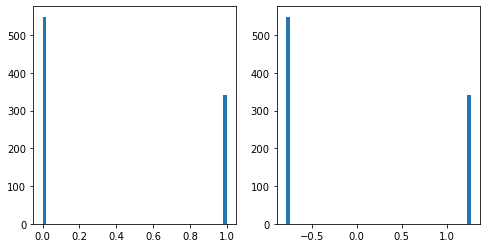

In [65]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['Survived'],bins=50)
plt.subplot(122)
plt.hist(df_scaled[0],bins=50)
plt.show()

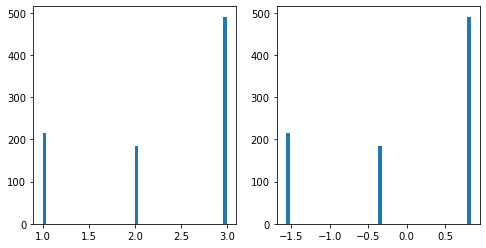

In [66]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['Pclass'],bins=50)
plt.subplot(122)
plt.hist(df_scaled[1],bins=50)
plt.show()

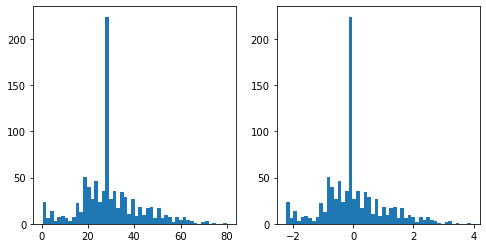

In [68]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['Age'],bins=50)
plt.subplot(122)
plt.hist(df_scaled[2],bins=50)
plt.show()

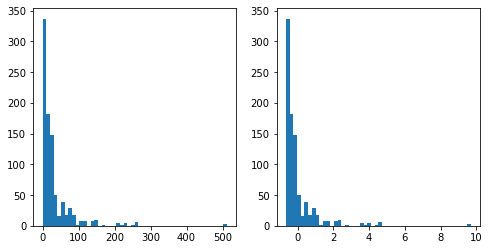

In [70]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.hist(df['Fare'],bins=50)
plt.subplot(122)
plt.hist(df_scaled[3],bins=50)
plt.show()

### Min-Max-Scaler

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
min_max=MinMaxScaler()

In [73]:
df_scaled=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [74]:
df_scaled

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


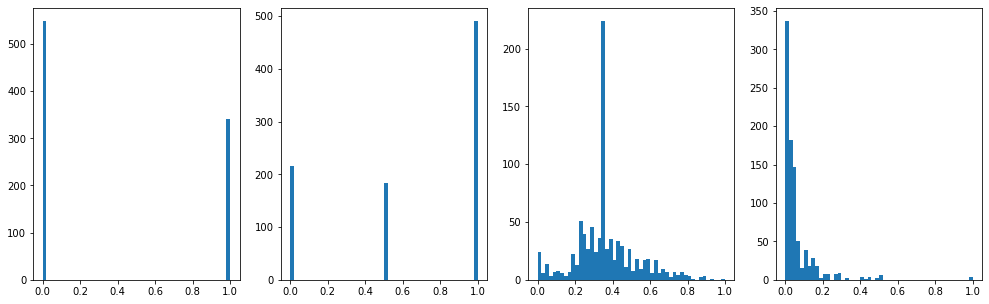

In [87]:
plt.figure(figsize=(17,5))
plt.subplot(141)
plt.hist(df_scaled['Survived'],bins=50)
plt.subplot(142)
plt.hist(df_scaled['Pclass'],bins=50)
plt.subplot(143)
plt.hist(df_scaled['Age'],bins=50)
plt.subplot(144)
plt.hist(df_scaled['Fare'],bins=50)
plt.show()

In [88]:
from sklearn.preprocessing import RobustScaler
RS=RobustScaler()

In [90]:
df_scaled=pd.DataFrame(RS.fit_transform(df),columns=df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


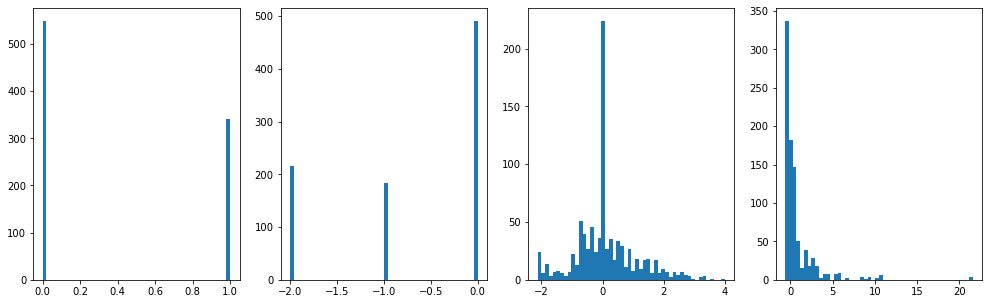

In [91]:
plt.figure(figsize=(17,5))
plt.subplot(141)
plt.hist(df_scaled['Survived'],bins=50)
plt.subplot(142)
plt.hist(df_scaled['Pclass'],bins=50)
plt.subplot(143)
plt.hist(df_scaled['Age'],bins=50)
plt.subplot(144)
plt.hist(df_scaled['Fare'],bins=50)
plt.show()

#### Gaussian Transformation

In [92]:
df=pd.read_csv(path+r'\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [93]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [94]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

###### we use Q-Q plot if we  want to check whether the feature is guassian distributed or normally distributed 

In [95]:
import scipy.stats as stat
import pylab

In [96]:
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    df[feature].hist(bins=20)
    plt.subplot(122)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

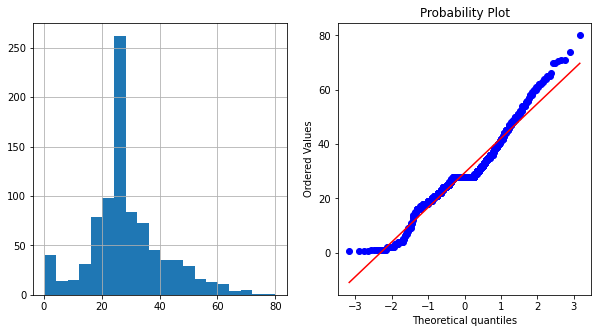

In [97]:
plot_data(df,'Age')

In [98]:
df['Age_log']=np.log(df['Age'])

In [99]:
df.head()

,Survived,Age,Fare,Age_log
0,0,22.0,7.2500,3.091042
1,1,38.0,71.2833,3.637586
2,1,26.0,7.9250,3.258097
3,1,35.0,53.1000,3.555348
4,0,35.0,8.0500,3.555348


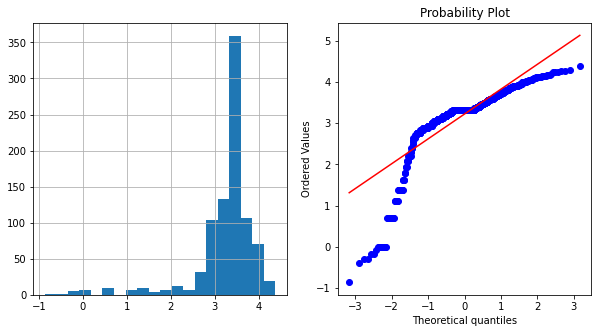

In [100]:
plot_data(df,'Age_log')

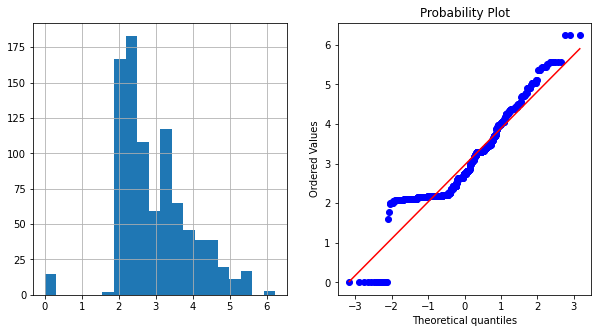

In [114]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

### Reciprocal transformation

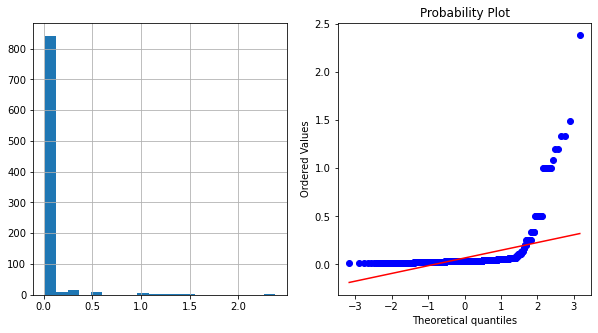

In [101]:
df['Age_recp']=1/df['Age']
plot_data(df,'Age_recp')

### Square Root Transformation

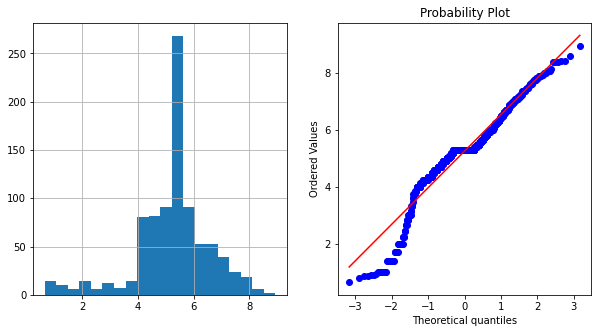

In [102]:
df['Age_sqrt']=np.sqrt(df['Age'])
plot_data(df,'Age_sqrt')

#### Exponential Transformation

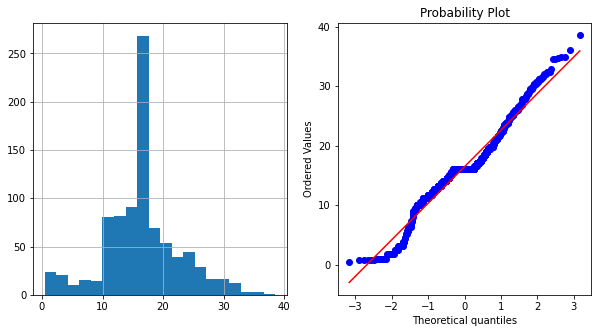

In [109]:
df['Age_exp']=df.Age**(1/1.2)
plot_data(df,'Age_exp')

### Boxcox Transformation

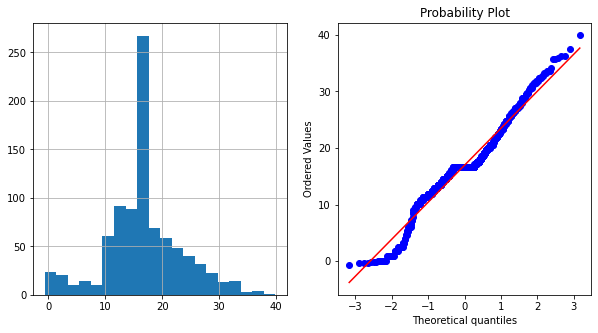

In [111]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
plot_data(df,'Age_Boxcox')

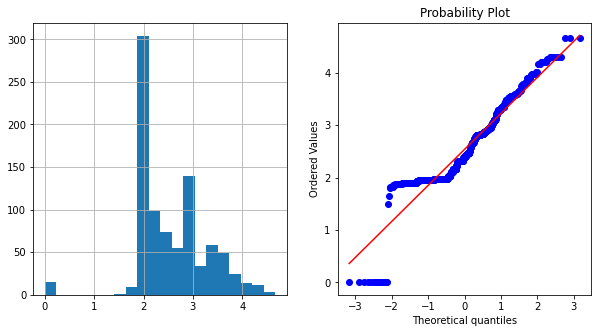

In [113]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1) #when we get any error just use +1
plot_data(df,'Fare_Boxcox')

### Handling Imbalanced Dataset

In [43]:
#pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
X=df.drop('Class',axis=1)
y=df['Class']

In [11]:
X.shape

(284807, 30)

In [12]:
y.shape

(284807,)

#### Cross validation like KFold and hyper-parameter technique must be preferred when we have imbalanced data

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [13]:
log_reg=LogisticRegression()

In [15]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [27]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [29]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

In [30]:
clf=GridSearchCV(log_reg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

D:\Pythoninstallation\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Pythoninstallation\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Pythoninstallation\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Pythoninstallation\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [31]:
y_preds=clf.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85245    33]
 [   55   110]]
0.9989700736163291
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.77      0.67      0.71       165

    accuracy                           1.00     85443
   macro avg       0.88      0.83      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_preds=rfc.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85267    11]
 [   38   127]]
0.9994265182636377
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.92      0.77      0.84       165

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
class_weight=dict({0:1,1:100})

In [38]:
rfc=RandomForestClassifier(class_weight=class_weight)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [40]:
y_preds=rfc.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85269     9]
 [   44   121]]
0.9993797034280163
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.93      0.73      0.82       165

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [48]:
Counter(y_train)

Counter({0: 199037, 1: 327})

In [58]:
y_train.value_counts()

0    199037
1       327
Name: Class, dtype: int64

In [59]:
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\Pythoninstallation\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199037, 1: 327})
The number of classes after fit Counter({0: 408, 1: 327})


In [61]:
0.8*408

326.40000000000003

In [63]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [64]:
y_preds=rfc.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[69372 15906]
 [   15   150]]
0.8136652505178891
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     85278
           1       0.01      0.91      0.02       165

    accuracy                           0.81     85443
   macro avg       0.50      0.86      0.46     85443
weighted avg       1.00      0.81      0.90     85443



###### We can see undersampling lead to very bad accuracy hence its not good to prefer unless or untill we have a very very  less dataset,but and we can definetely use the Nearmiss parameter and try to do it

#### OverSampling

In [65]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
os=RandomOverSampler(0.5)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\Pythoninstallation\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199037, 1: 327})
The number of classes after fit Counter({0: 199037, 1: 99518})


In [68]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [69]:
y_preds=rfc.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85269     9]
 [   43   122]]
0.9993914071369217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.93      0.74      0.82       165

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



###### Here we can see a better prediction in false negative(43) and false positive(9).hence if we use more % the result might be more better than this

In [70]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\Pythoninstallation\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199037, 1: 327})
The number of classes after fit Counter({0: 199037, 1: 149277})


In [71]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [72]:
y_preds=rfc.predict(X_test)
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85269     9]
 [   43   122]]
0.9993914071369217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.93      0.74      0.82       165

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### SMOTETomek

it takes more time compare to oversampling because here based on nearest points more number of points will be created

In [73]:
from imblearn.combine import SMOTETomek

In [77]:
st=SMOTETomek(0.75)
X_train_ns,y_train_ns=st.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\Pythoninstallation\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199037, 1: 327})
The number of classes after fit Counter({0: 198581, 1: 148821})


In [78]:
rfc=RandomForestClassifier()
rfc.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [76]:
y_preds=rfc.predict(X_test)    #When 0,5
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85256    22]
 [   33   132]]
0.9993562960102056
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.86      0.80      0.83       165

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [79]:
y_preds=rfc.predict(X_test)    #When 0,75
print(confusion_matrix(y_test,y_preds))
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))

[[85258    20]
 [   34   131]]
0.9993679997191109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85278
           1       0.87      0.79      0.83       165

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### Ensemble Techniques